In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('coin_Bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
df.shape

(2991, 10)

In [ ]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


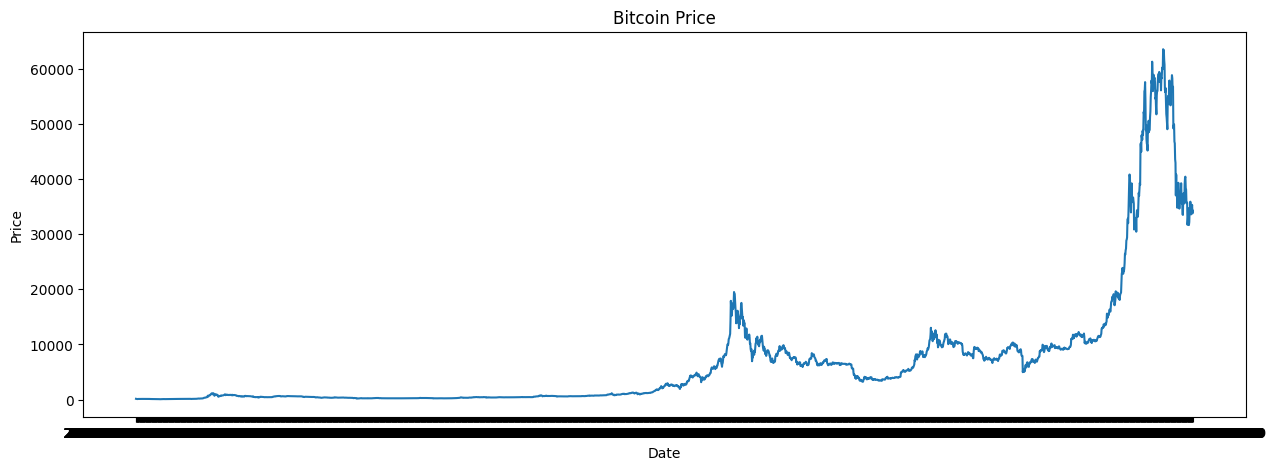

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
df.isnull().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


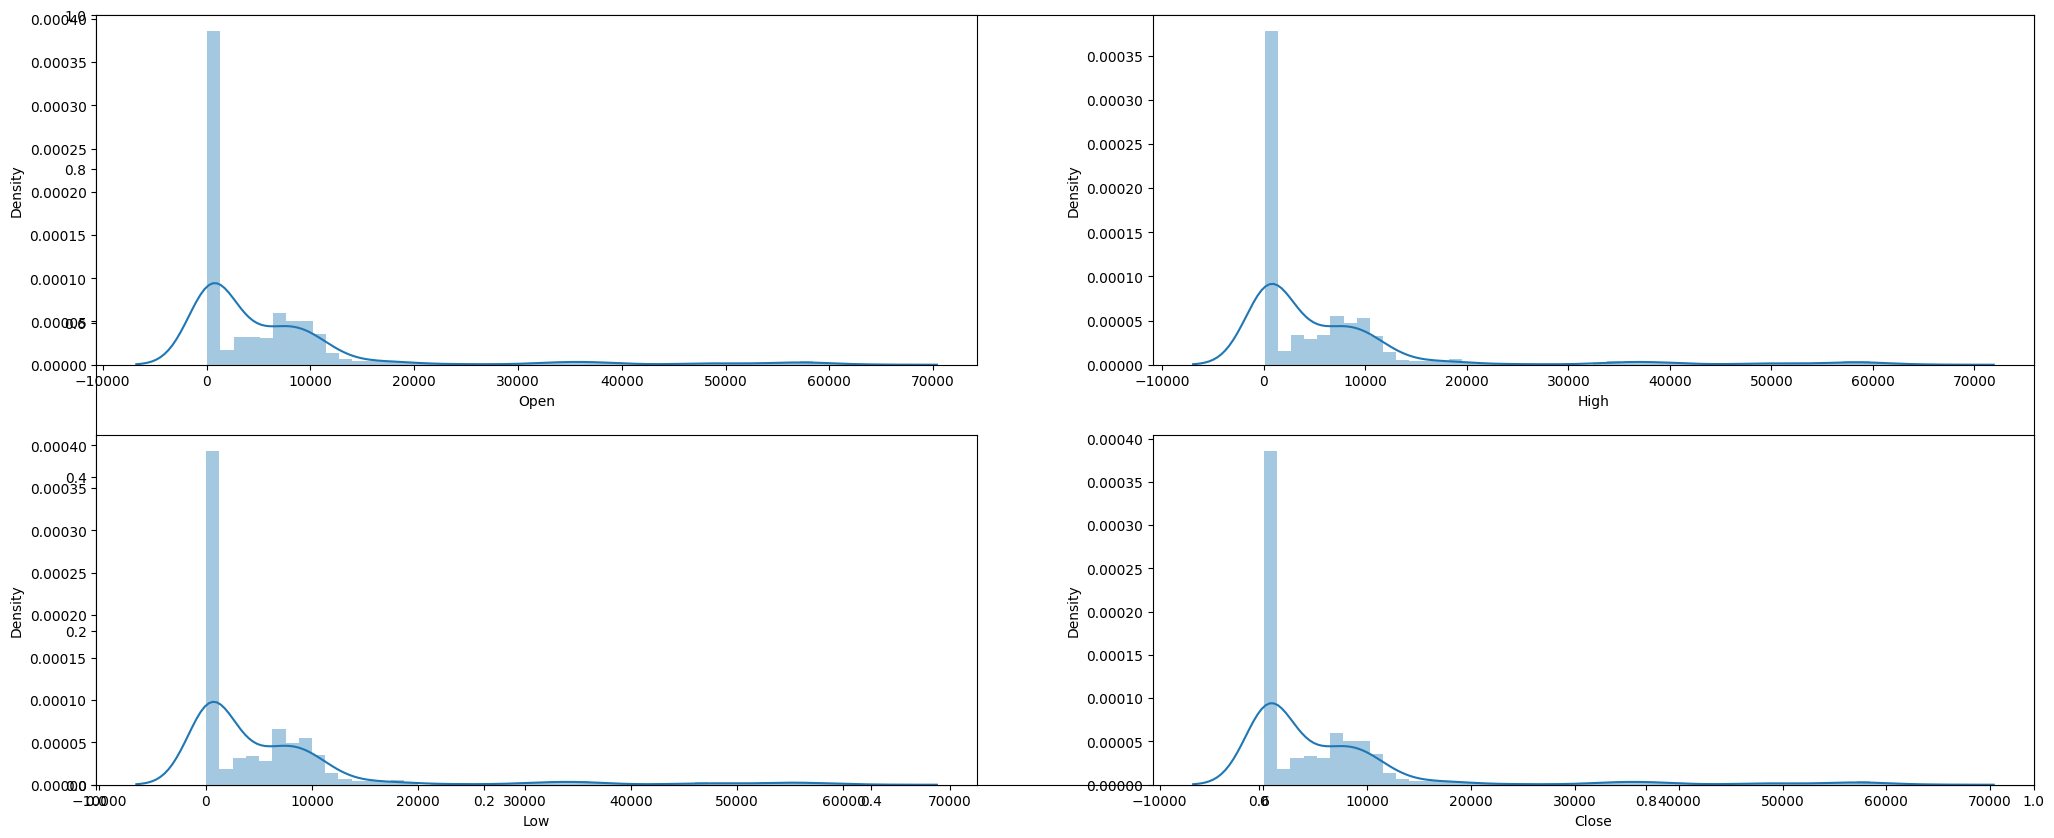

In [ ]:
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(25, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sb.distplot(df[col])
plt.show()

NameError: name 'features' is not defined

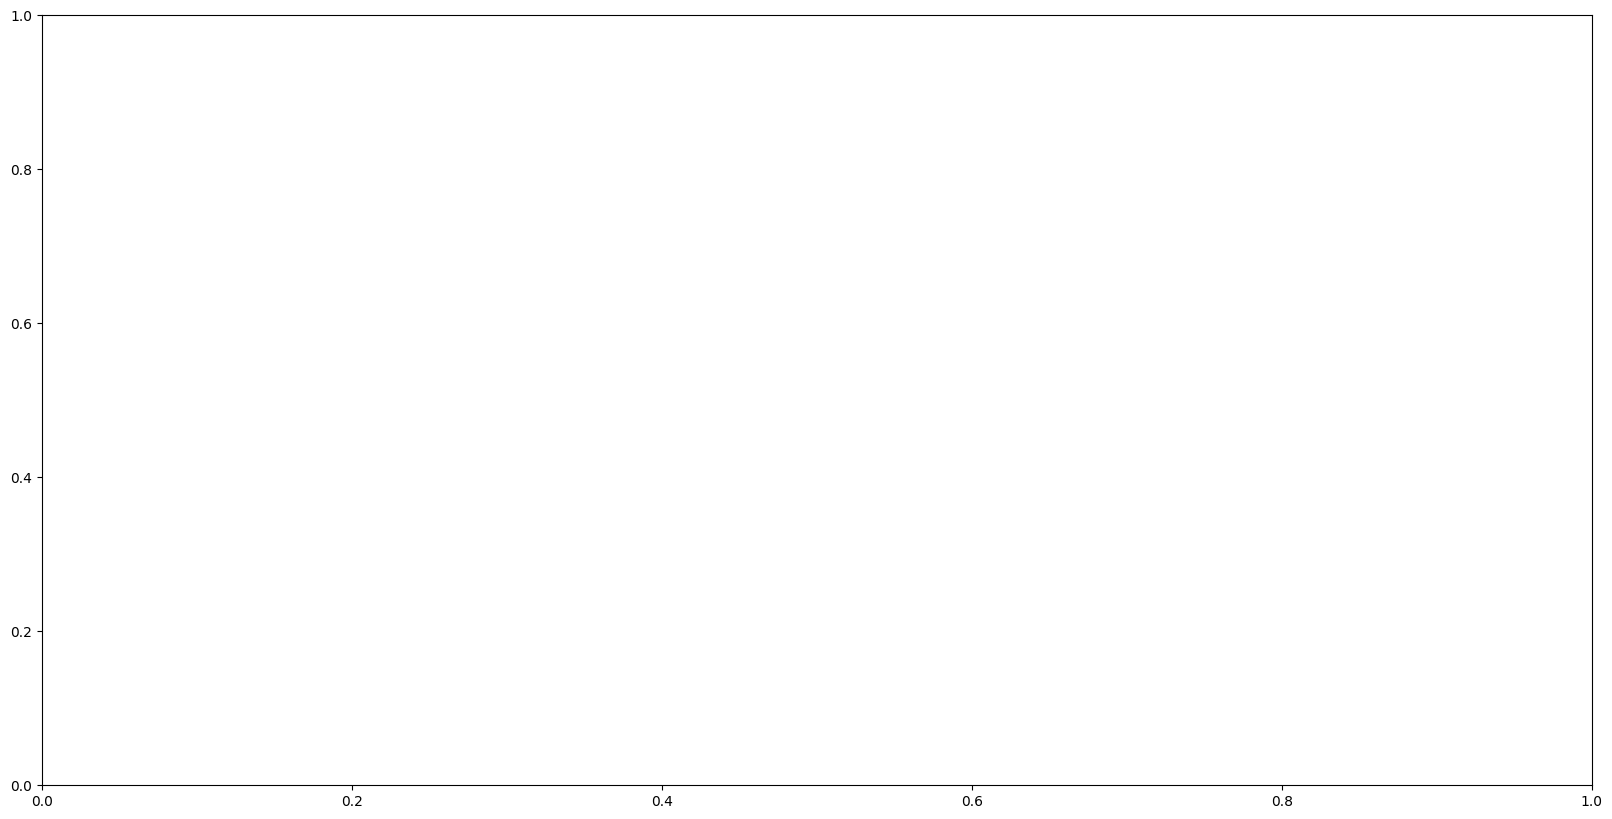

In [ ]:
plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Time'] = df['Date'].dt.time

df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,open-close,low-high,target,Year,Month,Day,Time
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,-10.095993,-13.488007,0,2013,4,29,23:59:59
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,5.000000,-12.879990,0,2013,4,30,23:59:59
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,22.010002,-32.169998,0,2013,5,1,23:59:59
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,11.169998,-33.318100,0,2013,5,2,23:59:59
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,8.500000,-29.028000,1,2013,5,3,23:59:59


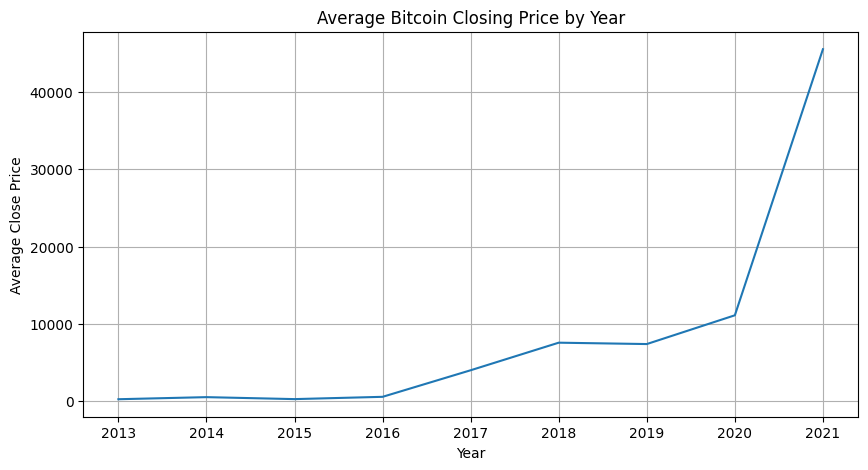

In [ ]:
date_grouped = df.groupby('Year')[['Open', 'High', 'Low', 'Close']].mean()

plt.subplots(figsize=(10,5))
plt.plot(date_grouped.index, date_grouped['Close'])
plt.title('Average Bitcoin Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.show()

In [ ]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
print(df.shape)
df.head()

(2991, 18)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,open-close,low-high,target,Year,Month,Day,Time,is_quarter_end
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,-10.095993,-13.488007,0,2013,4,29,23:59:59,0
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,5.000000,-12.879990,0,2013,4,30,23:59:59,0
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,22.010002,-32.169998,0,2013,5,1,23:59:59,0
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,11.169998,-33.318100,0,2013,5,2,23:59:59,0
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,8.500000,-29.028000,1,2013,5,3,23:59:59,0


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,open-close,low-high,target,Year,Month,Day,Time,is_quarter_end
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,-10.095993,-13.488007,0,2013,4,29,23:59:59,0
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,5.000000,-12.879990,0,2013,4,30,23:59:59,0
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,22.010002,-32.169998,0,2013,5,1,23:59:59,0
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,11.169998,-33.318100,0,2013,5,2,23:59:59,0
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,8.500000,-29.028000,1,2013,5,3,23:59:59,0


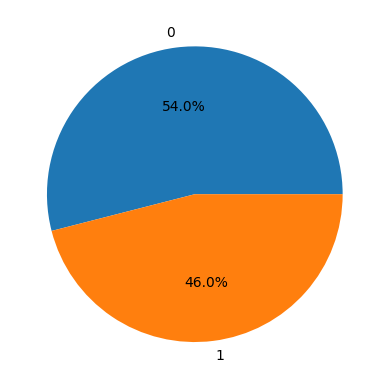

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

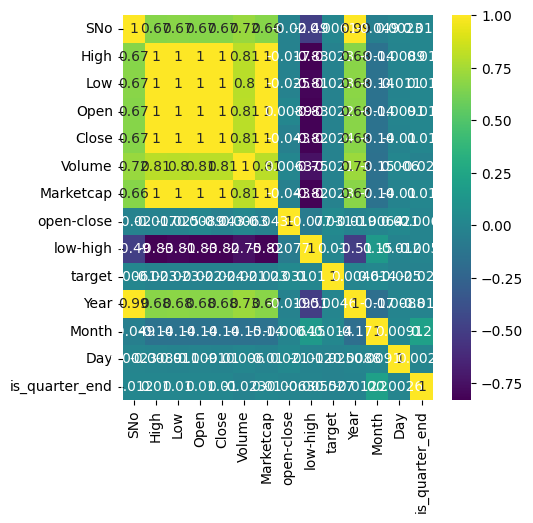

In [ ]:
plt.figure(figsize=(5, 5))

numeric_df = df.select_dtypes(include='number')

sb.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,open-close,low-high,target,Year,Month,Day,Time,is_quarter_end
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,-10.095993,-13.488007,0,2013,4,29,23:59:59,0
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,5.000000,-12.879990,0,2013,4,30,23:59:59,0
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,22.010002,-32.169998,0,2013,5,1,23:59:59,0
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,11.169998,-33.318100,0,2013,5,2,23:59:59,0
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,8.500000,-29.028000,1,2013,5,3,23:59:59,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train = features[:len(features)//7]
X_valid = features[len(features)//7:]
Y_train = target[:len(features)//7]
Y_valid = target[len(features)//7:]

53838

Training Accuracy: 58.31%
Validation Accuracy: 51.91%


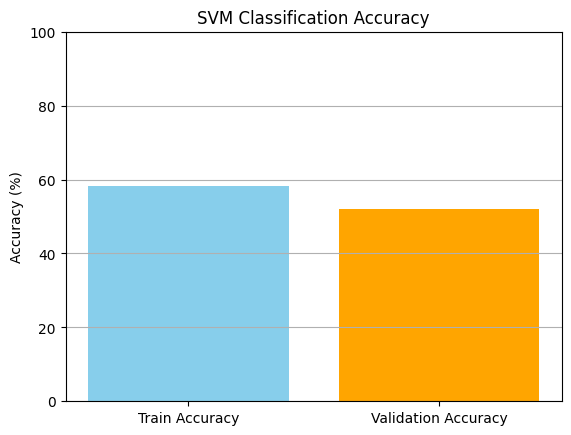

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = SVC(kernel='rbf')
model.fit(X_train, Y_train)
train_accuracy = accuracy_score(Y_train, model.predict(X_train))
valid_accuracy = accuracy_score(Y_valid, model.predict(X_valid))

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")
plt.bar(['Train Accuracy', 'Validation Accuracy'],
        [train_accuracy*100, valid_accuracy*100],
        color=['skyblue', 'orange'])

plt.ylabel('Accuracy (%)')
plt.title('SVM Classification Accuracy')
plt.ylim(0, 100)
plt.grid(True, axis='y')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)

y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)

train_accuracy = accuracy_score(Y_train, y_train_predict)
valid_accuracy = accuracy_score(Y_valid, y_valid_predict)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

plt.bar(['Train Accuracy', 'Validation Accuracy'],
        [train_accuracy*100, valid_accuracy*100],
        color=['skyblue', 'orange'])
plt.title('Logistic Regression Classification Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True, axis='y')
plt.show()

NameError: name 'X_train' is not defined

In [2]:
import requests
import pandas as pd
import datetime

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "90"}
response = requests.get(url, params=params)
data = response.json()

prices = data['prices']

df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['date'] = df['timestamp'].dt.date

df.head()

,timestamp,price,date
0,2025-02-20 12:04:53.780,97248.139305,2025-02-20
1,2025-02-20 13:04:21.306,97439.565178,2025-02-20
2,2025-02-20 14:05:43.049,97597.589843,2025-02-20
3,2025-02-20 15:09:30.030,97202.868999,2025-02-20
4,2025-02-20 16:04:41.884,96876.260934,2025-02-20


In [3]:
daily = df.groupby('date')['price'].agg(['first', 'last', 'max', 'min']).reset_index()
daily.columns = ['date', 'open', 'close', 'high', 'low']

# Feature Engineering
daily['open_close'] = daily['close'] - daily['open']
daily['low_high'] = daily['high'] - daily['low']
daily['is_quarter_end'] = daily['date'].apply(
    lambda d: 1 if d.month in [3, 6, 9, 12] and d.day > 25 else 0
)

daily['target'] = (daily['close'].shift(-1) > daily['close']).astype(int)
daily.head()

,date,open,close,high,low,open_close,low_high,is_quarter_end,target
0,2025-02-20,97248.139305,98227.332068,98519.059231,96876.260934,979.192763,1642.798297,0,0
1,2025-02-21,98336.687998,95744.671312,99244.090497,94909.234714,-2592.016686,4334.855783,0,1
2,2025-02-22,96135.155413,96635.747665,96857.716270,96135.155413,500.592252,722.560856,0,0
3,2025-02-23,96526.324519,96100.145127,96652.728402,95425.305286,-426.179392,1227.423116,0,0
4,2025-02-24,96265.428431,92361.398404,96265.428431,92361.398404,-3904.030027,3904.030027,0,0


In [4]:
daily = daily.dropna()

# Final features and target
X = daily[['open_close', 'low_high', 'is_quarter_end']]
y = daily['target']

print("successfull!")

successfull!


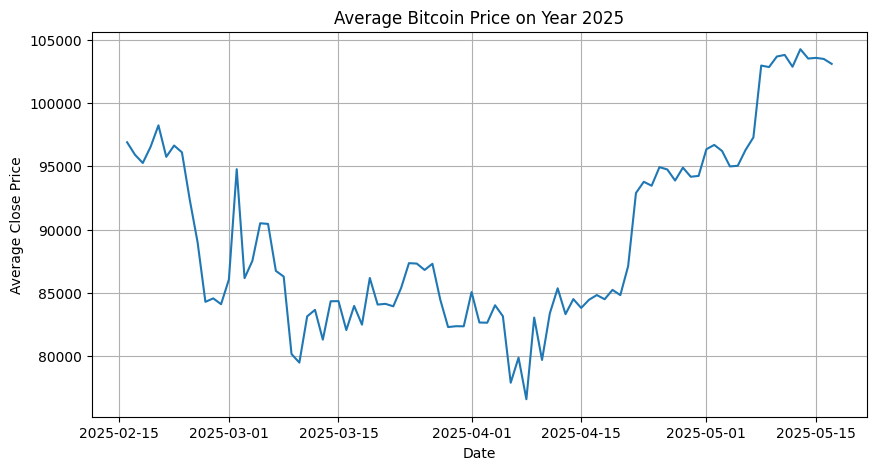

In [ ]:
import matplotlib.pyplot as plt

date_grouped = daily.groupby('date')[['open', 'high', 'low', 'close']].mean()
plt.subplots(figsize=(10,5))
plt.plot(date_grouped.index, date_grouped['close'])
plt.title('Average Bitcoin Price on Year 2025')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pickle


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

with open("btc_xgb_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("btc_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:02:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model and Scaler saved successfully!


In [6]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5263157894736842
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.60      0.55      0.57        11

    accuracy                           0.53        19
   macro avg       0.52      0.52      0.52        19
weighted avg       0.53      0.53      0.53        19



In [8]:
import pickle
import numpy as np


with open("btc_xgb_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("btc_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Your real-time values (example)
open_price = 102725.98
close_price = 103555.22
high_price = 104836.23
low_price = 102651.42
month = 5
day = 13

open_close = close_price - open_price
low_high = high_price - low_price
is_quarter_end = 1 if month in [3, 6, 9, 12] and day > 25 else 0

input_features = [[open_close, low_high, is_quarter_end]]
scaled_input = scaler.transform(input_features)

# Make prediction
pred = model.predict(scaled_input)[0]
print("🔮 Tomorrow's Prediction:", "↑ UP" if pred == 1 else "↓ DOWN")


🔮 Tomorrow's Prediction: ↓ DOWN


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import requests

response = requests.get("https://api.coinbase.com/v2/prices/BTC-USD/spot")
data = response.json()
print("Current BTC Spot Price (USD):", data['data']['amount'])


Current BTC Spot Price (USD): 103200.65


In [10]:
import yfinance as yf
import datetime
import pickle

with open("btc_xgb_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("btc_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

btc = yf.Ticker("BTC-USD")
hist = btc.history(period="1d", interval="1d")

if not hist.empty:
    open_price = hist['Open'].iloc[0]
    close_price = hist['Close'].iloc[0]
    high_price = hist['High'].iloc[0]
    low_price = hist['Low'].iloc[0]


    open_close = close_price - open_price
    low_high = high_price - low_price

    today = datetime.datetime.now()
    month = today.month
    day = today.day
    is_quarter_end = 1 if month in [3, 6, 9, 12] and day > 25 else 0


    input_features = [[open_close, low_high, is_quarter_end]]
    scaled_input = scaler.transform(input_features)
    pred = model.predict(scaled_input)[0]

    print(" Open:", open_price)
    print(" Close:", close_price)
    print(" High:", high_price)
    print(" Low:", low_price)
    print(" Prediction for Tomorrow:", "↑ UP" if pred == 1 else "↓ DOWN")
else:
    print(" No historical data returned from Yahoo Finance.")


 Open: 106853.828125
 Close: 106563.1015625
 High: 107955.8828125
 Low: 106144.90625
 Prediction for Tomorrow: ↓ DOWN


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
